In [1]:
# Test lmfit

In [349]:
from numpy import exp, sin
import numpy as np
from lmfit import minimize, Parameters


def residual(params, x, data, eps_data):
    amp = params['amp']
    phaseshift = params['phase']
    freq = params['frequency']
    decay = params['decay']

    model = amp * sin(x*freq + phaseshift) * exp(-x*x*decay)

    return (data-model) / eps_data


x = np.linspace(0.1, 5, 200)
data = 10 * sin(x*3 + .2) * exp(-x*x*.007)
eps_data = np.ones_like(data)
params = Parameters()

params.add('amp', value=10, min=8, max=11, vary=True, brute_step=.5)
params.add('decay', value=0.007, min=0.006, max=0.009, vary=True, brute_step=0.001)
params.add('phase', value=0.2, min=0.1, max=0.3, vary=False)
params.add('frequency', value=3.0, min=1, max=4.1, vary=True, brute_step=1)

out = minimize(residual, params, args=(x, data, eps_data), method="brute")

print(out)

names = out.var_names
index = names.index("frequency")

print(index, "index of freq param")
brute = out.brute_grid
print(brute.shape)
print("done")

2 index of freq param
(3, 6, 3, 4)
done


/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/lmfit/minimizer.py:1574: RuntimeWarning: divide by zero encountered in log
  _neg2_log_likel = result.ndata * np.log(result.chisqr / result.ndata)


In [269]:
out


In [317]:
grid = out.brute_grid
print("grid shape", grid.shape)
grid
grid = np.atleast_3d(grid)

print("grid shape", grid.shape)
grid=np.atleast_3d(grid[1])
print("grid shape", grid.shape)

grid shape (3, 6, 3, 4)
grid shape (3, 6, 3, 4)
grid shape (6, 3, 4)


In [318]:
Jout = out.brute_Jout
Jout = np.atleast_3d(Jout)
print("grid shape", grid.shape)
print("jout shape", Jout.shape)
Jout

grid shape (6, 3, 4)
jout shape (6, 3, 4)


array([[[1.68494977e+04, 1.74667228e+04, 3.52452397e+02, 1.72730079e+04],
        [1.67035465e+04, 1.73310622e+04, 3.75586906e+02, 1.71385469e+04],
        [1.65622084e+04, 1.71981437e+04, 3.99790533e+02, 1.70070148e+04]],

       [[1.77503878e+04, 1.83554879e+04, 1.93073250e+02, 1.81577548e+04],
        [1.75879090e+04, 1.82061549e+04, 2.11267634e+02, 1.80090314e+04],
        [1.74305760e+04, 1.80598682e+04, 2.30787253e+02, 1.78635854e+04]],

       [[1.87024134e+04, 1.92894235e+04, 8.13937628e+01, 1.90886238e+04],
        [1.85225356e+04, 1.91258071e+04, 9.38967264e+01, 1.89249488e+04],
        [1.83483653e+04, 1.89655569e+04, 1.08003309e+02, 1.87649192e+04]],

       [[1.97055743e+04, 2.02685297e+04, 1.74139369e+01, 2.00656150e+04],
        [1.95074264e+04, 2.00900188e+04, 2.34741816e+01, 1.98862991e+04],
        [1.93155763e+04, 1.99152096e+04, 3.14387002e+01, 1.97110162e+04]],

       [[2.07598707e+04, 2.12928064e+04, 1.13377190e+00, 2.10887284e+04],
        [2.05425814e+04, 2.109

In [319]:
par = "amp"

In [320]:
idx = out.var_names.index(par)
print(idx)
out.var_names

0


['amp', 'decay', 'frequency']

In [323]:
x = grid[idx]
y = Jout[idx]
print(x, x.shape)
print(y, y.shape)

[[0.006 0.006 0.006 0.006]
 [0.007 0.007 0.007 0.007]
 [0.008 0.008 0.008 0.008]] (3, 4)
[[16849.49771212 17466.72280926   352.45239731 17273.00792618]
 [16703.54652898 17331.06218832   375.58690559 17138.54690312]
 [16562.20835353 17198.14368026   399.79053308 17007.01479615]] (3, 4)


<function matplotlib.pyplot.show>

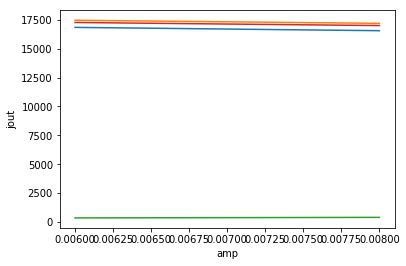

In [324]:

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel(par)
plt.ylabel("jout")
plt.show

In [325]:
Jout.shape


(6, 3, 4)

array([ 0.        ,  1.093427  ,  1.1337719 , 16.96748926, 17.41393693,
       23.4741816 , 23.4741816 , 31.43870025, 32.55326775, 81.39376284,
       93.8967264 ])

In [326]:
np.amin(Jout, axis=1)


array([[1.65622084e+04, 1.71981437e+04, 3.52452397e+02, 1.70070148e+04],
       [1.74305760e+04, 1.80598682e+04, 1.93073250e+02, 1.78635854e+04],
       [1.83483653e+04, 1.89655569e+04, 8.13937628e+01, 1.87649192e+04],
       [1.93155763e+04, 1.99152096e+04, 1.74139369e+01, 1.97110162e+04],
       [2.03322089e+04, 2.09088266e+04, 0.00000000e+00, 2.07018762e+04],
       [2.13982632e+04, 2.19464076e+04, 1.69674893e+01, 2.17374995e+04]])

In [327]:
np.amin(np.amin(Jout, axis=2), axis=0)

array([1.1337719, 0.       , 1.093427 ])

In [328]:
np.amin(Jout, axis=0)

array([[1.68494977e+04, 1.74667228e+04, 1.13377190e+00, 1.72730079e+04],
       [1.67035465e+04, 1.73310622e+04, 0.00000000e+00, 1.71385469e+04],
       [1.65622084e+04, 1.71981437e+04, 1.09342700e+00, 1.70070148e+04]])

In [348]:

xv, yv, zv = out.brute_grid   # meshgrid
print(out.brute_grid.shape)
print(xv.shape)


(3, 6, 3, 4)
(6, 3, 4)
[[[8.5e+00 8.5e+00 8.5e+00 8.5e+00]
  [8.5e+00 8.5e+00 8.5e+00 8.5e+00]
  [8.5e+00 8.5e+00 8.5e+00 8.5e+00]]

 [[6.0e-03 6.0e-03 6.0e-03 6.0e-03]
  [7.0e-03 7.0e-03 7.0e-03 7.0e-03]
  [8.0e-03 8.0e-03 8.0e-03 8.0e-03]]

 [[1.0e+00 2.0e+00 3.0e+00 4.0e+00]
  [1.0e+00 2.0e+00 3.0e+00 4.0e+00]
  [1.0e+00 2.0e+00 3.0e+00 4.0e+00]]]
[[[0.006 0.006 0.006 0.006]
  [0.007 0.007 0.007 0.007]
  [0.008 0.008 0.008 0.008]]

 [[0.006 0.006 0.006 0.006]
  [0.007 0.007 0.007 0.007]
  [0.008 0.008 0.008 0.008]]

 [[0.006 0.006 0.006 0.006]
  [0.007 0.007 0.007 0.007]
  [0.008 0.008 0.008 0.008]]

 [[0.006 0.006 0.006 0.006]
  [0.007 0.007 0.007 0.007]
  [0.008 0.008 0.008 0.008]]

 [[0.006 0.006 0.006 0.006]
  [0.007 0.007 0.007 0.007]
  [0.008 0.008 0.008 0.008]]

 [[0.006 0.006 0.006 0.006]
  [0.007 0.007 0.007 0.007]
  [0.008 0.008 0.008 0.008]]]


In [344]:
xv + yv + zv

array([[[ 9.006, 10.006, 11.006, 12.006],
        [ 9.007, 10.007, 11.007, 12.007],
        [ 9.008, 10.008, 11.008, 12.008]],

       [[ 9.506, 10.506, 11.506, 12.506],
        [ 9.507, 10.507, 11.507, 12.507],
        [ 9.508, 10.508, 11.508, 12.508]],

       [[10.006, 11.006, 12.006, 13.006],
        [10.007, 11.007, 12.007, 13.007],
        [10.008, 11.008, 12.008, 13.008]],

       [[10.506, 11.506, 12.506, 13.506],
        [10.507, 11.507, 12.507, 13.507],
        [10.508, 11.508, 12.508, 13.508]],

       [[11.006, 12.006, 13.006, 14.006],
        [11.007, 12.007, 13.007, 14.007],
        [11.008, 12.008, 13.008, 14.008]],

       [[11.506, 12.506, 13.506, 14.506],
        [11.507, 12.507, 13.507, 14.507],
        [11.508, 12.508, 13.508, 14.508]]])

In [334]:
xv == out.brute_grid[0]

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [338]:
result = out.brute_Jout
axes = (ii for ii in range(result.ndim) if ii!=idx)
axes = tuple(axes)
print(axes)

result = np.amin(result, axis=axes )
print(result)
print(result.shape)
print(out.brute_Jout)

(1, 2)
[352.45239731 193.07324964  81.39376284  17.41393693   0.
  16.96748926]
(6,)
[[[1.68494977e+04 1.74667228e+04 3.52452397e+02 1.72730079e+04]
  [1.67035465e+04 1.73310622e+04 3.75586906e+02 1.71385469e+04]
  [1.65622084e+04 1.71981437e+04 3.99790533e+02 1.70070148e+04]]

 [[1.77503878e+04 1.83554879e+04 1.93073250e+02 1.81577548e+04]
  [1.75879090e+04 1.82061549e+04 2.11267634e+02 1.80090314e+04]
  [1.74305760e+04 1.80598682e+04 2.30787253e+02 1.78635854e+04]]

 [[1.87024134e+04 1.92894235e+04 8.13937628e+01 1.90886238e+04]
  [1.85225356e+04 1.91258071e+04 9.38967264e+01 1.89249488e+04]
  [1.83483653e+04 1.89655569e+04 1.08003309e+02 1.87649192e+04]]

 [[1.97055743e+04 2.02685297e+04 1.74139369e+01 2.00656150e+04]
  [1.95074264e+04 2.00900188e+04 2.34741816e+01 1.98862991e+04]
  [1.93155763e+04 1.99152096e+04 3.14387002e+01 1.97110162e+04]]

 [[2.07598707e+04 2.12928064e+04 1.13377190e+00 2.10887284e+04]
  [2.05425814e+04 2.10987900e+04 0.00000000e+00 2.08930824e+04]
  [2.033220

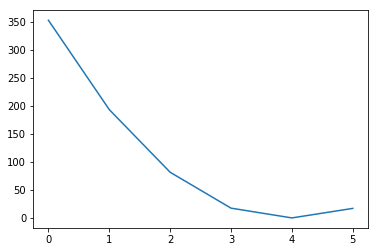

In [342]:
plt.plot(result)

In [366]:
chi2 = [out.candidates[num].score for num in range(10)]

In [365]:
np.sort(Jout.flatten())[0:11]

array([ 0.        ,  1.093427  ,  1.1337719 , 16.96748926, 17.41393693,
       23.4741816 , 23.4741816 , 31.43870025, 32.55326775, 81.39376284,
       93.8967264 ])

In [381]:
out.candidates[0].params["amp"].value

10.0

In [386]:
teffs = [out.candidates[num].params["decay"].value for num in range(10) if out.candidates[num].score < out.candidates[0].score +6]

print(teffs)

[0.007, 0.008, 0.006]


In [389]:
out.can



Candidate #0, chisqr = 0.000
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp              10        8       11     None     True     None      0.5
decay         0.007    0.006    0.009     None     True     None    0.001
frequency         3        1      4.1     None     True     None        1
phase           0.2      0.1      0.3     None    False     None     None
